In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [10]:

plt.style.use('ggplot')
sns.set_palette("viridis")

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Data Preparation Complete for Iris Dataset ---")
print(f"Feature names: {iris.feature_names}")
print(f"Target names (classes): {iris.target_names}")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

--- Data Preparation Complete for Iris Dataset ---
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (classes): ['setosa' 'versicolor' 'virginica']
Training data shape: (120, 4)
Test data shape: (30, 4)


In [11]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

point1 = np.array([1, 2, 3, 4])
point2 = np.array([5, 6, 7, 8])

distance = euclidean_distance(point1, point2)

print("--- Euclidean Distance Calculation ---")
print(f"Distance between point1 and point2: {distance:.4f}")

--- Euclidean Distance Calculation ---
Distance between point1 and point2: 8.0000


In [12]:
def _get_neighbors(X_train, y_train, test_row, k):
   
    distances = []
    for i, train_row in enumerate(X_train):
        dist = euclidean_distance(test_row, train_row)
        distances.append((dist, y_train[i]))
        
    distances.sort(key=lambda item: item[0])
    
    neighbors = distances[:k]
    
    return neighbors

k = 5
test_sample = X_test_scaled[0]
true_label_of_test_sample = y_test[0]

neighbors = _get_neighbors(X_train_scaled, y_train, test_sample, k)

print("--- Finding K-Nearest Neighbors ---")
print(f"The true label of the test sample is: {true_label_of_test_sample} ({iris.target_names[true_label_of_test_sample]})")
print(f"\nThe {k} nearest neighbors are (distance, label):")
for neighbor in neighbors:
    print(f"Distance: {neighbor[0]:.4f}, Label: {neighbor[1]}")

--- Finding K-Nearest Neighbors ---
The true label of the test sample is: 1 (versicolor)

The 5 nearest neighbors are (distance, label):
Distance: 0.3482, Label: 1
Distance: 0.3677, Label: 1
Distance: 0.4228, Label: 1
Distance: 0.5041, Label: 1
Distance: 0.5219, Label: 2


In [13]:
from collections import Counter

def _predict_classification(neighbors):
    
    neighbor_labels = [neighbor[1] for neighbor in neighbors]
    
    most_common = Counter(neighbor_labels).most_common(1)[0][0]
    
    return most_common

predicted_label = _predict_classification(neighbors)

print("--- Making a Prediction ---")
print(f"The labels of the {k} nearest neighbors are: {[n[1] for n in neighbors]}")
print(f"The true label of the test sample is: {true_label_of_test_sample} ({iris.target_names[true_label_of_test_sample]})")
print(f"The predicted label from the majority vote is: {predicted_label} ({iris.target_names[predicted_label]})")

if predicted_label == true_label_of_test_sample:
    print("\nThe prediction was correct! ✅")
else:
    print("\nThe prediction was incorrect. ❌")

--- Making a Prediction ---
The labels of the 5 nearest neighbors are: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2)]
The true label of the test sample is: 1 (versicolor)
The predicted label from the majority vote is: 1 (versicolor)

The prediction was correct! ✅


In [14]:
class KNN:
    def __init__(self, k=3):
       
        self.k = k

    def fit(self, X, y):
        
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
       
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        
        neighbors = self._get_neighbors(x)
        
        prediction = self._majority_vote(neighbors)
        
        return prediction

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def _get_neighbors(self, test_row):
        distances = []
        for i, train_row in enumerate(self.X_train):
            dist = self._euclidean_distance(test_row, train_row)
            distances.append((dist, self.y_train[i]))
            
        distances.sort(key=lambda item: item[0])
        neighbors = distances[:self.k]
        return neighbors

    def _majority_vote(self, neighbors):
        neighbor_labels = [neighbor[1] for neighbor in neighbors]
        most_common = Counter(neighbor_labels).most_common(1)[0][0]
        return most_common



my_knn = KNN(k=5)

my_knn.fit(X_train_scaled, y_train)

y_pred_scratch = my_knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_scratch)

print("--- Final Evaluation of From-Scratch KNN Model ---")
print(f"The accuracy of our custom KNN model is: {accuracy:.4f}")

--- Final Evaluation of From-Scratch KNN Model ---
The accuracy of our custom KNN model is: 1.0000


In [15]:
from sklearn.neighbors import KNeighborsClassifier

print("--- Scikit-learn KNN Model ---")

sklearn_knn = KNeighborsClassifier(n_neighbors=5)

sklearn_knn.fit(X_train_scaled, y_train)

y_pred_sklearn = sklearn_knn.predict(X_test_scaled)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"The accuracy of scikit-learn's KNN model is: {accuracy_sklearn:.4f}")
print(f"The accuracy of our custom KNN model was: {accuracy:.4f}")

print("\n--- Full Classification Report ---")
print(classification_report(y_test, y_pred_sklearn, target_names=iris.target_names))

--- Scikit-learn KNN Model ---
The accuracy of scikit-learn's KNN model is: 1.0000
The accuracy of our custom KNN model was: 1.0000

--- Full Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



--- Finding the best K for our dataset ---
Accuracy for k=1: 1.0000
Accuracy for k=2: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=4: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=6: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=8: 1.0000
Accuracy for k=9: 1.0000
Accuracy for k=10: 1.0000
Accuracy for k=11: 1.0000
Accuracy for k=12: 1.0000
Accuracy for k=13: 1.0000
Accuracy for k=14: 1.0000
Accuracy for k=15: 1.0000
Accuracy for k=16: 1.0000
Accuracy for k=17: 1.0000
Accuracy for k=18: 1.0000
Accuracy for k=19: 1.0000
Accuracy for k=20: 1.0000
Accuracy for k=21: 1.0000
Accuracy for k=22: 1.0000
Accuracy for k=23: 1.0000
Accuracy for k=24: 1.0000
Accuracy for k=25: 1.0000


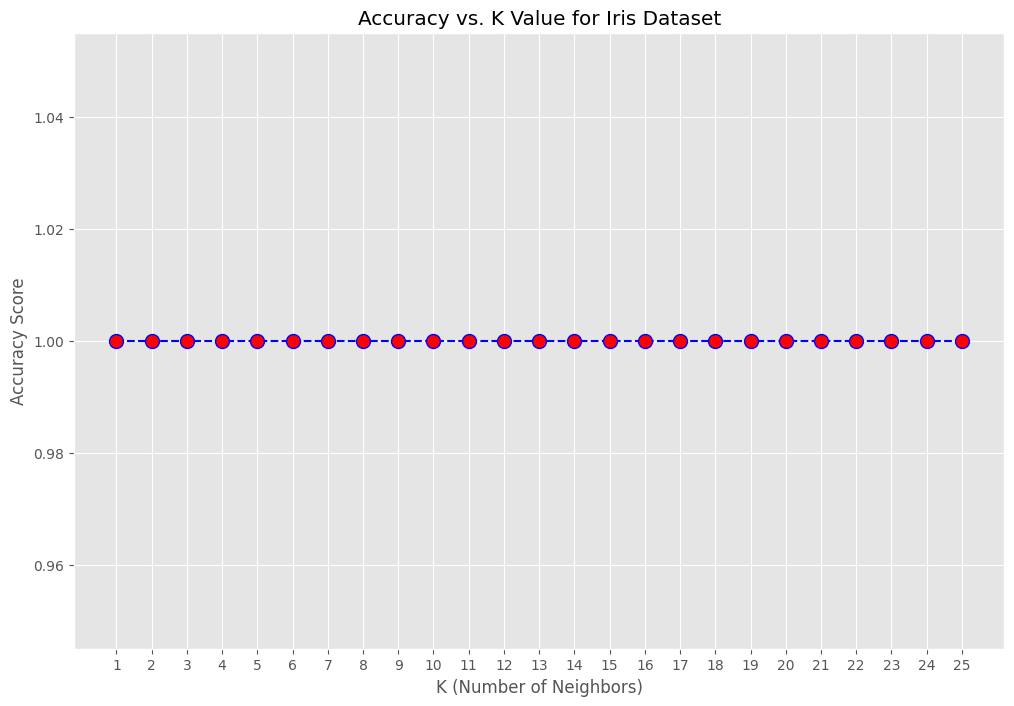


The optimal value for K appears to be: 1


In [16]:
accuracy_scores = []

k_range = range(1, 26)

print("--- Finding the best K for our dataset ---")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.4f}")

plt.figure(figsize=(12, 8))
plt.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value for Iris Dataset')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(accuracy_scores)]
print(f"\nThe optimal value for K appears to be: {best_k}")